## Описание проекта

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Цель исследования** — проверьте две гипотезы:
1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. 


**Ход исследования**
Исследование пройдёт в пять этапов:
 1. Описание проекта.
 2. Предобработка данных.
 3. Анализ данных.
 4. Проверка гипотез.
 5. Общий вывод.

Импортируем необходимые библиотеки и сохраним необходимые данные в таблицах

In [1]:
# импорт библиотек Pandas и Matplotlib и Numpy, чтение файла с данными и сохранение в df 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

calls_df = pd.read_csv('/datasets/calls.csv')
internet_df = pd.read_csv('/datasets/internet.csv')
messages_df = pd.read_csv('/datasets/messages.csv')
tariffs_df = pd.read_csv('/datasets/tariffs.csv')
users_df = pd.read_csv('/datasets/users.csv')

Проверим информацию в таблицах

In [2]:
#посмотрим таблицу 'calls_df'
calls_df

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [3]:
#посмотрим информацию о таблице 'calls_df'
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропусков в столбцах таблицы `calls_df` не обнаружено, наименование столбцов соответствующее. 
У столбца `call_date` можно сменить тип данных со строки на тип даты и времени (datetime)

In [4]:
#посмотрим таблицу 'internet_df'
internet_df

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [5]:
#посмотрим информацию о таблице 'internet_df'
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Пропусков в столбцах таблицы `internet_df` не обнаружено, наименование столбцов соответствующее. 
В таблице есть лишний столбец с повторяющейся индексацией `Unnamed: 0`, который лучше удалить.
У столбца `session_date` можно сменить тип данных со строки на тип даты и времени (datetime).

In [6]:
#посмотрим таблицу 'messages_df'
messages_df

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [7]:
#посмотрим информацию о таблице 'messages_df'
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропусков в столбцах таблицы `messages_df` не обнаружено, наименование столбцов соответствующее. 
У столбца `message_date` можно сменить тип данных со строки на тип даты и времени (datetime)

In [8]:
#посмотрим таблицу 'tariffs_df'
tariffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
#посмотрим информацию о таблице 'tariffs_df'
tariffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


С таблицей `tariffs_df` на первый взгляд все впорядке 

In [10]:
#посмотрим таблицу 'users_df'
users_df

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [11]:
#посмотрим информацию о таблице 'users_df'
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Пропуски в таблице `users_df` обнаружены только в столбце `churn_date` -  дата прекращения пользования тарифом, это означает, что тариф еще действовал на момент выгрузки данных. Наименование столбцов соответствующее. 
У столбца `reg_date` можно сменить тип данных со строки на тип даты и времени (datetime).

### Описание данных
Таблица **users_df** (информация о пользователях):<br>
`user_id` — уникальный идентификатор пользователя<br>
`first_name` — имя пользователя<br>
`last_name` — фамилия пользователя<br>
`age` — возраст пользователя (годы)<br>
`reg_date` — дата подключения тарифа (день, месяц, год)<br>
`churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
`city` — город проживания пользователя<br>
`tarif` — название тарифного плана<br>
Таблица **calls_df** (информация о звонках):<br>
`id` — уникальный номер звонка<br>
`call_date` — дата звонка<br>
`duration` — длительность звонка в минутах<br>
`user_id` — идентификатор пользователя, сделавшего звонок<br>
Таблица **messages_df** (информация о сообщениях):<br>
`id` — уникальный номер сообщения<br>
`message_date` — дата сообщения<br>
`user_id` — идентификатор пользователя, отправившего сообщение<br>
Таблица **internet_df** (информация об интернет-сессиях):<br>
`id` — уникальный номер сессии<br>
`mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
`session_date` — дата интернет-сессии<br>
`user_id` — идентификатор пользователя<br>
Таблица **tariffs_df** (информация о тарифах):<br>
`tariff_name` — название тарифа<br>
`rub_monthly_fee` — ежемесячная абонентская плата в рублях<br>
`minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату<br>
`messages_included` — количество сообщений в месяц, включённых в абонентскую плату<br>
`mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
`rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
`rub_per_message` — стоимость отправки сообщения сверх тарифного пакета<br>
`rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

 ### Вывод

Данные содержатся в пяти таблицах `users_df`, `calls_df`, `messages_df`, `internet_df`, `tariffs_df`.

Пропуски обнаружены только в таблице `users_df` в столбце `churn_date` -  дата прекращения пользования тарифом это означает, что тариф еще действовал на момент выгрузки данных. У столбца `reg_date`  таблицы `users_df` можно сменить тип данных со строки на тип даты и времени (datetime).

В таблице `calls_df` - у столбца `call_date` можно сменить тип данных со строки на тип даты и времени (datetime)

В таблице`internet_df` есть лишний столбец с повторяющейся индексацией `Unnamed: 0`, который лучше удалить, а у столбца `session_date` можно сменить тип данных со строки на тип даты и времени (datetime).

В таблице `messages_df` - у столбца `message_date` можно сменить тип данных со строки на тип даты и времени (datetime)

Наименование всех столбцов соответствующее. 

## Предобработка данных

### Исправление ошибок в данных

Исправим строчный тип данных с датой на тип datetime

In [12]:
#создадим функцию для перевода типа данных из строки в datetime
def todate (row):
    return pd.to_datetime(row, format='%Y-%m-%d')

In [13]:
#изменим тип данных столбца 'call_date'
calls_df['call_date'] = calls_df['call_date'].apply(todate)

In [14]:
#изменим тип данных столбца 'reg_date'
users_df['reg_date'] = users_df['reg_date'].apply(todate)

In [15]:
#изменим тип данных столбца 'session_date'
internet_df['session_date'] = internet_df['session_date'].apply(todate)

In [16]:
#изменим тип данных столбца 'message_date'
messages_df['message_date'] = messages_df['message_date'].apply(todate)

Удалим лишний столбец `Unnamed: 0` в таблице `internet_df`

In [17]:
#удалим лишний столбец 'Unnamed: 0'
internet_df = internet_df.drop(columns = ['Unnamed: 0'],axis = 1)

Округлим в большую сторону время звонка т.к. в тарифах идет округление до минут

In [18]:
#округлим в большую сторону значения столбца 'duration', с помощью numpy
calls_df['duration'] = np.ceil(calls_df['duration']).astype(int)
calls_df['duration']

0          0
1          0
2          3
3         14
4          6
          ..
202602     1
202603    19
202604    11
202605     5
202606    20
Name: duration, Length: 202607, dtype: int64

### Расчёты и добавления результатов

####  Расчёт количества сделанных звонков и израсходованных минут разговора по месяцам

Создадим столбец `month` с месяцами в таблице `calls_df`

In [19]:
#cоздадаём столбец 'month' с месяцами в таблице calls_df
calls_df['month'] = calls_df['call_date'].dt.month

Посчитаем количество сделанных звонков (с учетом пропущенных звонков) и израсходованных минут разговора по месяцам для каждого пользователя

In [20]:
#посчитаем количество звонков для каждого пользователя в месяц
count_calls = calls_df.pivot_table(index=['user_id','month'], values='duration', aggfunc = ['count', 'sum'])
count_calls

count      sum
              duration duration
user_id month                  
1000    5           22      159
        6           43      172
        7           47      340
        8           52      408
        9           58      466
...                ...      ...
1498    10          41      247
1499    9            9       70
        10          68      449
        11          74      612
        12          69      492

[3174 rows x 2 columns]

По количеству строк таблицы видно, что в ней 492 пользователя, тогда как в таблице уникальных пользователей `users_df` - 500 уникальных пользователей. Для 8 пользователей нет данных по совершенным звонкам.

#### Расчёт количества отправленных сообщений по месяцам

Создадим столбец `month` с месяцами в таблице `messages_df`

In [21]:
#cоздадаём столбец 'month' с месяцами в таблице messages_df
messages_df['month'] = messages_df['message_date'].dt.month
#переименуем столбец 'id' в 'number_messages'
messages_df = messages_df.rename(columns={'id':'number_messages'})
messages_df

,number_messages,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


Посчитаем количество отправленных сообщений по месяцам

In [22]:
#считаем количество отправленных сообщений по месяцам
messages_sent = messages_df.pivot_table(index=['user_id','month'], values='number_messages', aggfunc = 'count')
messages_sent

number_messages
user_id month                 
1000    5                   22
        6                   60
        7                   75
        8                   81
        9                   57
...                        ...
1498    10                  42
1499    9                   11
        10                  48
        11                  59
        12                  66

[2717 rows x 1 columns]

По количеству строк таблицы видно, что в ней 426 пользователя, тогда как в таблице уникальных пользователей `users_df` - 500 уникальных пользователей. Для 74 пользователей нет данных по отправленным сообщениям.

#### Расчёт объема израсходованного интернет-трафика по месяцам

Создадим столбец `month` с месяцами в таблице `internet_df`

In [23]:
#cоздадаём столбец 'month' с месяцами в таблице internet_df
internet_df['month'] = internet_df['session_date'].dt.month
internet_df

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


Посчитаем объем израсходованного интернет-трафика по месяцам

In [24]:
#считаем объем израсходованного интернет-трафика по месяцам
internet_traffic = internet_df.pivot_table(index=['user_id','month'], values='mb_used', aggfunc = 'sum')
internet_traffic

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

По количеству строк таблицы видно, что в ней 497 пользователя, тогда как в таблице уникальных пользователей `users_df` - 500 уникальных пользователей. Для 3 пользователей нет данных о использовании интернета.

#### Расчёт помесячной выручку с каждого пользователя

Объединим все сводные таблицы в одну для дальнейшего расчета помесячной выручки с каждого пользователя

In [25]:
#объединяем таблицы 'count_calls' и 'messages_sent' по столбцам 'user_id' и 'month'
df = count_calls.merge(messages_sent, on=['user_id', 'month'], how='outer')
#добавляем таблицу 'internet_traffic'
df = df.merge(internet_traffic, on=['user_id', 'month'], how='outer')
#сбрасываем индексы
df = df.reset_index()
#добавляем таблицу 'users_df' по столбцу user_id'
df = df.merge(users_df, on=['user_id'])
#переименовываем столбцы
df.columns = ['user_id', 'month', 'number_calls', 'duration_calls',   'number_messages',  'mb_used',  'age',   'churn_date',  'city', 'first_name', 'last_name', 'reg_date', 'tariff']
df

,user_id,month,number_calls,duration_calls,number_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,17.0,11050.56,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,NaN,NaN,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,NaN,NaN,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,NaN,NaN,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


Так как не в каждый месяц, каждым пользователем совершались звонки, отправлялись сообщения или использовался интернет, то в таблице появились пропуски. Заменим данные пропуски на нули.

In [26]:
#заменяем пропуски нулями
df = df.fillna(0)

Выделим пользователей с тарифом `ultra` в отдельную таблицу `df_ultra`

In [27]:
#делаем срез по тарифу
df_ultra = df.query('tariff == "ultra"')
df_ultra 

,user_id,month,number_calls,duration_calls,number_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,159.0,22.0,2253.49,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,172.0,60.0,23233.77,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,340.0,75.0,14003.64,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,408.0,81.0,14055.93,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,466.0,57.0,14568.91,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,8,0.0,0.0,17.0,12905.40,18,0,Красноярск,Николай,Лебедев,2018-08-05,ultra
3205,1473,9,0.0,0.0,19.0,17289.85,18,0,Красноярск,Николай,Лебедев,2018-08-05,ultra
3206,1473,10,0.0,0.0,20.0,13688.65,18,0,Красноярск,Николай,Лебедев,2018-08-05,ultra
3207,1473,11,0.0,0.0,14.0,21673.80,18,0,Красноярск,Николай,Лебедев,2018-08-05,ultra


Выделим пользователей с тарифом `smart` в отдельную таблицу `df_smart`

In [28]:
#делаем срез по тарифу
df_smart = df.query('tariff == "smart"')
df_smart 

,user_id,month,number_calls,duration_calls,number_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
8,1001,11,59.0,430.0,0.0,18429.34,41,0,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12,63.0,414.0,0.0,14036.66,41,0,Москва,Иван,Ежов,2018-11-01,smart
10,1002,6,15.0,117.0,4.0,10856.82,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
11,1002,7,26.0,214.0,11.0,17580.10,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
12,1002,8,42.0,289.0,13.0,20319.26,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17.0,11050.56,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3210,1489,9,0.0,0.0,32.0,17206.30,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3211,1489,10,0.0,0.0,21.0,19559.44,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11,0.0,0.0,20.0,17491.56,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart


In [29]:
tariffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Создадим функцию `revenue`, которая рассчитывает помесячную выручку с каждого пользователя

In [30]:
#функция 'revenue' на входе строка таблицы df_ultra на выходе столбец с помесячной выручку с каждого пользователя
def revenue(row):
    internet_price = 0
    calls_price = 0
    messages_price = 0
    internet = row['mb_used']
    if (tariffs_df['mb_per_month_included'][1] - row['mb_used']) < 0:
        internet_price = np.ceil(abs(tariffs_df['mb_per_month_included'][1] - row['mb_used']) / 1024) * tariffs_df['rub_per_gb'][1]
    if (tariffs_df['minutes_included'][1] - row['duration_calls']) <0:
        calls_price = abs(tariffs_df['minutes_included'][1] - row['duration_calls']) * tariffs_df['rub_per_minute'][1]
    if (tariffs_df['messages_included'][1] - row['number_messages']) < 0:
        messages_price = abs(tariffs_df['messages_included'][1] - row['number_messages']) * tariffs_df['rub_per_message'][1]
    revenue = internet_price +  calls_price +  messages_price + 1950
    return  revenue

В столбце `revenue` таблицы `df_ultra` посчитаем помесячную выручку с каждого пользователя тарифа ultra

In [31]:
#вызов функции 'revenue' и сохранение результата в столбец 'revenue'
df_ultra['revenue'] = df_ultra.apply(revenue, axis=1)

In [32]:
#функция 'revenue_1' на входе строка таблицы df_smart на выходе столбец с помесячной выручку с каждого пользователя
def revenue_1(row):
    internet_price = 0
    calls_price = 0
    messages_price = 0
    internet = row['mb_used']
    if (tariffs_df['mb_per_month_included'][0] - row['mb_used']) < 0:
        internet_price = np.ceil(abs(tariffs_df['mb_per_month_included'][0] - row['mb_used']) / 1024) * tariffs_df['rub_per_gb'][0]
    if (tariffs_df['minutes_included'][0] - row['duration_calls']) <0:
        calls_price = abs(tariffs_df['minutes_included'][0] - row['duration_calls']) * tariffs_df['rub_per_minute'][0]
    if (tariffs_df['messages_included'][0] - row['number_messages']) < 0:
        messages_price = abs(tariffs_df['messages_included'][0] - row['number_messages']) * tariffs_df['rub_per_message'][0]
    revenue = internet_price +  calls_price +  messages_price + 550
    return  revenue

В столбце `revenue` таблицы `df_smart` посчитаем помесячную выручку с каждого пользователя тарифа smart

In [33]:
#вызов функции 'revenue_1' и сохранение результата в столбец 'revenue'
df_smart['revenue'] = df_smart.apply(revenue_1, axis=1)

Посмотрим срез таблицы `df_smart` для оценки получившегося результата 

In [34]:
#срез по звонкам длительностью больше, чем в тарифе
df_smart.query('duration_calls > 500')

,user_id,month,number_calls,duration_calls,number_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
32,1005,3,77.0,606.0,56.0,11104.25,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,886.0
33,1005,4,101.0,712.0,41.0,9351.72,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,1186.0
34,1005,5,73.0,595.0,42.0,7865.53,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,835.0
35,1005,6,80.0,612.0,47.0,9863.19,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,886.0
36,1005,7,77.0,569.0,56.0,7694.56,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,775.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,1496,8,88.0,527.0,41.0,23530.03,36,0,Вологда,Трифон,Блохин,2018-01-27,smart,2231.0
3163,1496,11,80.0,662.0,46.0,25063.40,36,0,Вологда,Трифон,Блохин,2018-01-27,smart,3036.0
3164,1496,12,80.0,518.0,51.0,20736.15,36,0,Вологда,Трифон,Блохин,2018-01-27,smart,1807.0
3167,1497,12,71.0,545.0,17.0,19918.60,32,0,Челябинск,Каролина,Агеева,2018-10-09,smart,1685.0


Посмотрим срез таблицы `df_ultra` для оценки получившегося результата 

In [35]:
#срез по объему интернет трафика больше, чем в тарифе
df_ultra.query('mb_used > 30720')

,user_id,month,number_calls,duration_calls,number_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
159,1024,11,157.0,1146.0,0.0,43107.47,73,0,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,3900.0
160,1024,12,136.0,949.0,0.0,35948.13,73,0,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,2850.0
311,1050,7,35.0,209.0,52.0,35177.91,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra,2700.0
383,1060,12,184.0,1233.0,52.0,43931.36,46,0,Калуга,Яков,Рудаков,2018-11-24,ultra,3900.0
782,1124,10,152.0,1225.0,121.0,49745.69,54,0,Махачкала,Альбин,Андрианов,2018-09-24,ultra,4800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,1231,9,0.0,0.0,188.0,33189.47,63,0,Чебоксары,Касьян,Авдюков,2018-05-23,ultra,2400.0
3198,1231,10,0.0,0.0,185.0,31032.93,63,0,Чебоксары,Касьян,Авдюков,2018-05-23,ultra,2100.0
3200,1231,12,0.0,0.0,191.0,32448.00,63,0,Чебоксары,Касьян,Авдюков,2018-05-23,ultra,2250.0
3202,1328,11,0.0,0.0,8.0,35525.58,44,0,Мурманск,Рауль,Аркадьев,2018-10-16,ultra,2700.0


### Вывод 



В ходе предобработки данных:
1) Исправили строчный тип данных с датой на тип datetime.

2) Удалили лишний столбец Unnamed: 0 в таблице internet_df.

3) Округлили в большую сторону время звонка т.к. в тарифах идет округление до минут.

4) Создали в таблицах столбцы `month` с разделением по месяцам.

5) Посчитали количество сделанных звонков (с учетом пропущенных звонков) и израсходованных минут разговора по месяцам для каждого пользователя.

6) Объединили все сводные таблицы в одну, для дальнейшего расчета помесячной выручки с каждого пользователя.

7) Так как не в каждый месяц, каждым пользователем совершались звонки, отправлялись сообщения или использовался интернет, то в таблице появились пропуски. Заменили данные пропуски на нули.

8) Выделили пользователей с тарифом ultra в отдельную таблицу df_ultra.

9) Создали функцию revenue, которая рассчитывает помесячную выручку с каждого пользователя.

При просмотре срезов таблиц df_smart и df_ultra, видно, что пользователи тарифа ultra превышают пакет тарифа только по интернет-трафику, в то время как пользователи тарифа smart превышают пакет тарифа по звонкам, сообщениям и интернет-трафику. 


По количеству строк таблиц, менее 500, видно, что:
* для 8 пользователей нет данных по совершенным звонкам; 
* для 74 пользователей нет данных по отправленным сообщениям; 
* для 3 пользователей нет данных о использовании интернета.

## Анализ данных

Посмотрим статистики по тарифам  

In [36]:
#cтатистики тарифа smart
df_smart.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,2229.0,1246.506505,146.119496,1001.0,1121.00,1239.00,1376.00,1499.00
month,2229.0,8.346792,2.920316,1.0,6.00,9.00,11.00,12.00
number_calls,2229.0,58.463437,25.939858,0.0,40.00,60.00,76.00,198.00
duration_calls,2229.0,417.934948,190.313730,0.0,282.00,422.00,545.00,1435.00
number_messages,2229.0,33.384029,28.227876,0.0,10.00,28.00,51.00,143.00
mb_used,2229.0,16208.386990,5870.476681,0.0,12643.01,16506.84,20042.93,38552.45
age,2229.0,46.556303,16.353371,18.0,32.00,47.00,62.00,75.00
revenue,2229.0,1289.973531,818.404367,550.0,550.00,1023.00,1750.00,6770.00


В среднем один пользователь тарифа smart тратит 1290 р. 

In [37]:
#cтатистики тарифа ultra
df_ultra.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,985.0,1263.094416,140.694908,1000.0,1143.00,1277.00,1381.00,1495.00
month,985.0,8.250761,2.871762,1.0,6.00,9.00,11.00,12.00
number_calls,985.0,73.392893,43.916853,0.0,41.00,74.00,104.00,244.00
duration_calls,985.0,526.623350,317.606098,0.0,284.00,518.00,752.00,1673.00
number_messages,985.0,49.363452,47.804457,0.0,6.00,38.00,79.00,224.00
mb_used,985.0,19468.805208,10087.170752,0.0,11770.26,19308.01,26837.69,49745.69
age,985.0,46.834518,17.107979,18.0,30.00,45.00,63.00,75.00
revenue,985.0,2070.152284,376.187114,1950.0,1950.00,1950.00,1950.00,4800.00


В среднем один пользователь тарифа ultra тратит 2070 р. 

Функции для построения графиков

In [38]:
#функция plot_custom_smart на входе столбец на выходе статистики и графики для тарифа smart
def plot_custom_smart(column):
    print('Медиана:', df_smart[column].median())
    print('Средняя:', df_smart[column].mean().round())
    print('Дисперсия:', np.around(np.var(df_smart[column])))
    print('Стандартное отклонение:', df_smart[column].std().round())
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df_smart[column], ax=ax_box)
    sns.distplot(df_smart[column], ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

In [39]:
#функция plot_custom_ultra на входе столбец на выходе статистики и графики для тарифа ultra
def plot_custom_ultra(column):
    print('Медиана:', df_ultra[column].median())
    print('Средняя:', df_ultra[column].mean().round())
    print('Дисперсия:', np.around(np.var(df_ultra[column])))
    print('Стандартное отклонение:', df_ultra[column].std().round())
    sns.set(style="ticks")
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df_ultra[column], ax=ax_box)
    sns.distplot(df_ultra[column], ax=ax_hist)
    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

Посчитаем среднее количество, дисперсию и стандартное отклонение длительности разговора, количества сообщений и объёма интернет-трафика. Построим гистограммы и диаграммы размаха.

Медиана: 422.0
Средняя: 418.0
Дисперсия: 36203.0
Стандартное отклонение: 190.0


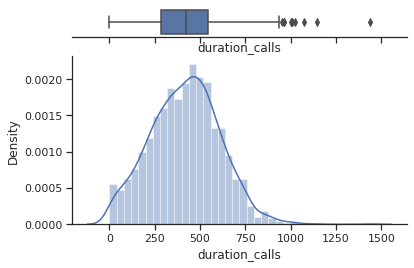

In [40]:
#вызываем функцию для построения графиков и отображения статистик
plot_custom_smart('duration_calls')

Медиана: 518.0
Средняя: 527.0
Дисперсия: 100771.0
Стандартное отклонение: 318.0


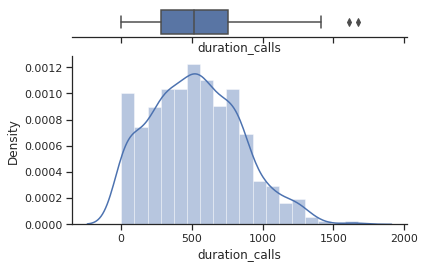

In [41]:
#вызываем функцию для построения графиков и отображения статистик
plot_custom_ultra('duration_calls')

Средняя и медианная продолжительность звонков на тарифе ultra больше, чем на тарифе smart. Распределение похоже на нормальное. Стандартное отклонение на тарифе ultra больше, чем на тарифе smart из-за чего график распределения длительности звонков на тарифе ultra более пологий. 

Медиана: 28.0
Средняя: 33.0
Дисперсия: 796.0
Стандартное отклонение: 28.0


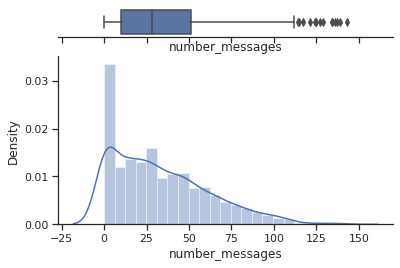

In [42]:
#вызываем функцию для построения графиков и отображения статистик
plot_custom_smart('number_messages')

Медиана: 38.0
Средняя: 49.0
Дисперсия: 2283.0
Стандартное отклонение: 48.0


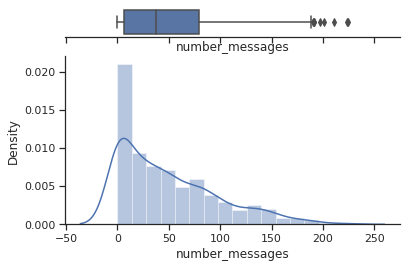

In [43]:
#вызываем функцию для построения графиков и отображения статистик
plot_custom_ultra('number_messages')

Среднее и медианное количество сообщений на тарифе ultra больше, чем на тарифе smart. Распределение похоже на экспоненциальное. Стандартное отклонение на тарифе ultra больше, чем на тарифе smart из-за чего график распределения  количество сообщений на тарифе ultra более пологий. 

Медиана: 16506.84
Средняя: 16208.0
Дисперсия: 34447035.0
Стандартное отклонение: 5870.0


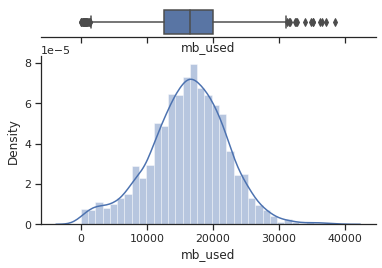

In [44]:
#вызываем функцию для построения графиков и отображения статистик
plot_custom_smart('mb_used')

Медиана: 19308.01
Средняя: 19469.0
Дисперсия: 101647713.0
Стандартное отклонение: 10087.0


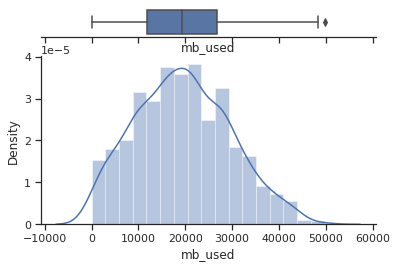

In [45]:
#вызываем функцию для построения графиков и отображения статистик
plot_custom_ultra('mb_used')

Среднее и медианное количество интернет-трафика ultra больше, чем на тарифе smart. Распределение похоже на нормальное. Стандартное отклонение на тарифе ultra больше, чем на тарифе smart из-за чего график распределения  количества интернет-трафика на тарифе ultra более пологий. 

Медиана: 1023.0
Средняя: 1290.0
Дисперсия: 669485.0
Стандартное отклонение: 818.0


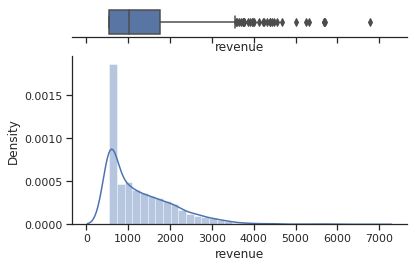

In [46]:
#вызываем функцию для построения графиков и отображения статистик
plot_custom_smart('revenue')

Медиана: 1950.0
Средняя: 2070.0
Дисперсия: 141373.0
Стандартное отклонение: 376.0


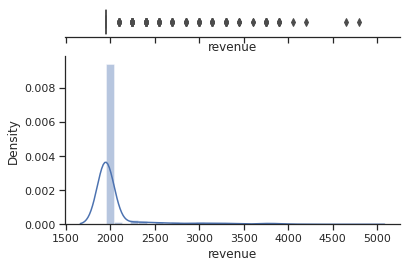

In [47]:
#вызываем функцию для построения графиков и отображения статистик
plot_custom_ultra('revenue')

Средняя и медианная выручка с каждого пользователя на тарифе ultra больше, чем на тарифе smart. Стандартное отклонение на тарифе smart больше, чем на тарифе ultra. 

По графикам видно, что клиентов вышедших за пределы пакета тарифа ultra практически нет, в то время как для тарифа smart заметная часть пользователей выходят за пределы пакета услуг.

### Вывод




В ходе анализа данных мы:
1) Посчитали статистики по тарифам.

2) Посчитали среднее количество, дисперсию и стандартное отклонение длительности разговора, количества сообщений, объёма интернет-трафика и выручки с каждого пользователя.

3) Построим гистограммы и диаграмму размаха для длительности разговора, количества сообщений, объёма интернет-трафика и выручки с каждого пользователя.

Выяснили что:
* Средняя и медианная продолжительность звонков на тарифе ultra (Медиана: 518, Средняя: 527) больше, чем на тарифе smart (Медиана: 422, Средняя: 418). 
* Распределение похоже на нормальное. 
* Стандартное отклонение на тарифе ultra (318) больше, чем на тарифе smart (190) из-за чего график распределения длительности звонков на тарифе ultra более пологий.


* Среднее и медианное количество сообщений на тарифе ultra (Медиана: 38, Средняя: 49) больше, чем на тарифе smart (Медиана: 28, Средняя: 33).
* Распределение похоже на экспоненциальное. 
* Стандартное отклонение на тарифе ultra (48) больше, чем на тарифе smart (28) из-за чего график распределения  количество сообщений на тарифе ultra более пологий.


* Среднее и медианное количество интернет-трафика ultra (Медиана: 19308, Средняя: 19469) больше, чем на тарифе smart (Медиана: 16506, Средняя: 16208). 
* Распределение похоже на нормальное. 
* Стандартное отклонение на тарифе ultra (10087) больше, чем на тарифе smart (5870) из-за чего график распределения  количества интернет-трафика на тарифе ultra более пологий.

* Средняя и медианная выручка с каждого пользователя на тарифе ultra (Медиана: 1950, Средняя: 2070) больше, чем на тарифе smart (Медиана: 1023, Средняя: 1290).  
* Стандартное отклонение на тарифе smart (818) больше, чем на тарифе ultra (376).
* По графикам видно, что клиентов, вышедших за пределы пакета тарифа ultra практически нет, в то время как для тарифа smart заметная часть пользователей выходят за пределы пакета услуг.

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Для проверки гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, сформулируем нулевую гипотезу H₀, что  средняя выручка пользователей тарифов «Ультра» и «Смарт» равны. 

Исходя из H₀ сформулируем альтернативную гипотеза H₁, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Это утверждение, которое принимается верным, если отбрасывается H₀. 

In [48]:
#проверяем гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт»
smart = df_smart['revenue']
ultra = df_ultra['revenue']
alpha = .05 
results = st.ttest_ind(
    smart, 
    ultra)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


Проверим среднии выручки по тарифам

In [49]:
round(df_smart['revenue'].mean())

1290

In [50]:
round(df_ultra['revenue'].mean())

2070

Средняя выручка на тарифе ultra сильно больше (более 60%), чем на тарифе smart

Гипотеза H₀ о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт» отвергнута, значит принимается гипотеза H₁ о не равенстве средней выручки пользователей тарифов «Ультра» и «Смарт». 

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, сформулируем нулевую гипотезу H₀, что средняя выручка пользователей из Москвы и выручка пользователей из других регионов равны.

Исходя из H₀ сформулируем альтернативную гипотеза H₁, что средняя выручка пользователей из Москвы и выручка пользователей из других регионов различаются. Это утверждение, которое принимается верным, если отбрасывается H₀.

Проверим данные гипотезы для тарифа smart

In [51]:
#в таблице тарифа smart сделаем срез по пользователям из Москвы
df_smart_moscow = df_smart.query('city == "Москва"')
df_smart_moscow

,user_id,month,number_calls,duration_calls,number_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
8,1001,11,59.0,430.0,0.0,18429.34,41,0,Москва,Иван,Ежов,2018-11-01,smart,1150.0
9,1001,12,63.0,414.0,0.0,14036.66,41,0,Москва,Иван,Ежов,2018-11-01,smart,550.0
53,1007,4,25.0,198.0,11.0,8022.76,65,0,Москва,Юна,Березина,2018-04-19,smart,550.0
54,1007,5,67.0,480.0,39.0,17687.27,65,0,Москва,Юна,Березина,2018-04-19,smart,1150.0
55,1007,6,68.0,545.0,26.0,13654.52,65,0,Москва,Юна,Березина,2018-04-19,smart,685.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,1490,8,45.0,346.0,50.0,17275.37,30,0,Москва,Радомир,Алесин,2018-04-03,smart,950.0
3121,1490,9,44.0,322.0,48.0,14816.95,30,0,Москва,Радомир,Алесин,2018-04-03,smart,550.0
3122,1490,10,42.0,312.0,45.0,20664.97,30,0,Москва,Радомир,Алесин,2018-04-03,smart,1750.0
3123,1490,11,38.0,282.0,47.0,18712.66,30,0,Москва,Радомир,Алесин,2018-04-03,smart,1350.0


In [52]:
#в таблице тарифа smart сделаем срез по пользователям из регионов
df_smart_unmoscow = df_smart.query('city != "Москва"')
df_smart_unmoscow

,user_id,month,number_calls,duration_calls,number_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
10,1002,6,15.0,117.0,4.0,10856.82,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,550.0
11,1002,7,26.0,214.0,11.0,17580.10,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,1150.0
12,1002,8,42.0,289.0,13.0,20319.26,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,1550.0
13,1002,9,36.0,206.0,4.0,16691.08,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,950.0
14,1002,10,33.0,212.0,10.0,13888.25,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,0.0,17.0,11050.56,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,550.0
3210,1489,9,0.0,0.0,32.0,17206.30,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,950.0
3211,1489,10,0.0,0.0,21.0,19559.44,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,1550.0
3212,1489,11,0.0,0.0,20.0,17491.56,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,1150.0


In [53]:
#проверяем гипотезу о равенстве средней выручки пользователей из Москвы и выручке пользователей из других регионов для тарифа smart
moscow = df_smart_moscow['revenue'] 
unmoscow = df_smart_unmoscow['revenue']
alpha = .05 
results = st.ttest_ind(
    moscow, 
    unmoscow)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.18150864159228705
Не получилось отвергнуть нулевую гипотезу


Гипотеза H₀ о равенстве средней выручки пользователей из Москвы и выручке пользователей из других регионов принята, значит гипотеза H₁ о не равенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов отвергается для тарифа smart.

Проверим данные гипотезы для тарифа ultra

In [54]:
#в таблице тарифа ultra сделаем срез по пользователям из Москвы
df_ultra_moscow = df_ultra.query('city == "Москва"')
df_ultra_moscow

,user_id,month,number_calls,duration_calls,number_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
17,1003,8,55.0,380.0,37.0,8565.21,23,0,Москва,Белла,Белякова,2018-08-17,ultra,1950.0
18,1003,9,134.0,961.0,91.0,12468.87,23,0,Москва,Белла,Белякова,2018-08-17,ultra,1950.0
19,1003,10,108.0,855.0,83.0,14768.14,23,0,Москва,Белла,Белякова,2018-08-17,ultra,1950.0
20,1003,11,115.0,824.0,94.0,11356.89,23,0,Москва,Белла,Белякова,2018-08-17,ultra,1950.0
21,1003,12,108.0,802.0,75.0,10121.53,23,0,Москва,Белла,Белякова,2018-08-17,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,1476,9,72.0,622.0,5.0,18602.93,50,0,Москва,Валентина,Семенова,2018-04-30,ultra,1950.0
3036,1476,10,68.0,540.0,4.0,25125.69,50,0,Москва,Валентина,Семенова,2018-04-30,ultra,1950.0
3037,1476,11,71.0,556.0,6.0,14410.79,50,0,Москва,Валентина,Семенова,2018-04-30,ultra,1950.0
3038,1476,12,81.0,588.0,11.0,14121.34,50,0,Москва,Валентина,Семенова,2018-04-30,ultra,1950.0


In [55]:
#в таблице тарифа ultra сделаем срез по пользователям из регионов
df_ultra_unmoscow = df_ultra.query('city != "Москва"')
df_ultra_unmoscow

,user_id,month,number_calls,duration_calls,number_messages,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,revenue
0,1000,5,22.0,159.0,22.0,2253.49,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204,1473,8,0.0,0.0,17.0,12905.40,18,0,Красноярск,Николай,Лебедев,2018-08-05,ultra,1950.0
3205,1473,9,0.0,0.0,19.0,17289.85,18,0,Красноярск,Николай,Лебедев,2018-08-05,ultra,1950.0
3206,1473,10,0.0,0.0,20.0,13688.65,18,0,Красноярск,Николай,Лебедев,2018-08-05,ultra,1950.0
3207,1473,11,0.0,0.0,14.0,21673.80,18,0,Красноярск,Николай,Лебедев,2018-08-05,ultra,1950.0


In [56]:
#проверяем гипотезу о равенстве средней выручки пользователей из Москвы и выручке пользователей из других регионов для тарифа ultra
moscow = df_ultra_moscow['revenue'] 
unmoscow = df_ultra_unmoscow['revenue']
alpha = .05 
results = st.ttest_ind(
    moscow, 
    unmoscow)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8614477943640767
Не получилось отвергнуть нулевую гипотезу


Гипотеза H₀ о равенстве средней выручки пользователей из Москвы и выручке пользователей из других регионов принята, значит гипотеза H₁ о неравенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов отвергается для тарифа ultra.

### Вывод

Для проверки гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, сформулировали нулевую гипотезу H₀, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.

Исходя из H₀ сформулировали альтернативную гипотезу H₁, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. 
Задали уровень значимости  5% и получили p-значение: 1.4229814360764067e-160, что отвергает нулевую гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт». 

Значит принимается гипотеза H₁ о неравенстве средней выручки пользователей тарифов «Ультра» и «Смарт».


Для проверки гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, сформулировали нулевую гипотезу H₀, что средняя выручка пользователей из Москвы и выручка пользователей из других регионов равны.

Исходя из H₀ сформулировали альтернативную гипотеза H₁, что средняя выручка пользователей из Москвы и выручка пользователей из других регионов различаются. 
Задали уровень значимости  5% и получили p-значение = 0.18150864159228705 для тарифа smart, что не позволяет отвергнуть гипотезу H₀ о равенстве средней выручки пользователей из Москвы и выручке пользователей из других регионов принята, значит гипотеза H₁ о не равенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов отвергается для тарифа smart.

для тарифа ultra p-значение = 1.0, что не позволяет отвергнуть гипотезу H₀ о равенстве средней выручки пользователей из Москвы и выручке пользователей из других регионов принята, значит гипотеза H₁ о неравенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов отвергается для тарифа ultra.

Гипотеза о разной средней выручке в зависимости от тарифа подтвердилась.

Гипотеза о разной средней выручке в зависимости от региона отклонена.

Средняя выручка зависит от тарифа и не зависит от региона.

## Общий вывод

Данные содержатся в пяти таблицах: 
* users_df; 
* calls_df; 
* messages_df; 
* internet_df; 
* tariffs_df.
Пропуски обнаружены только в таблице users_df. 
в столбце churn_date - дата прекращения пользования тарифом это означает, что тариф еще действовал намомент выгрузки данных.<br> 
У столбца reg_date таблицы users_df можно сменить тип данных со строки на тип даты и времени (datetime).<br> 
В таблице calls_df - у столбца call_date можно сменить тип данных со строки на тип даты и времени (datetime).<br> 
В таблицеinternet_df есть лишний столбец с повторяющейся индексацией Unnamed: 0, который лучше удалить.<br>
У столбца session_date можно сменить тип данных со строки на тип даты и времени (datetime).<br>
В таблице messages_df - у столбца message_date можно сменить тип данных со строки на тип даты и времени (datetime).<br>
Наименование всех столбцов соответствующее.<br>


В ходе предобработки данных:
1) Исправили строчный тип данных с датой на тип datetime.<br>
2) Удалили лишний столбец Unnamed: 0 в таблице internet_df.<br>
3) Округлили в большую сторону время звонка т.к. в тарифах идет округление до минут.<br>
4) Создали в таблицах столбцы month с разделением по месяцам.<br>
5) Посчитали количество сделанных звонков (с учетом пропущенных звонков) и израсходованных минут разговора по месяцам для каждого пользователя.<br>
6) Объединили все сводные таблицы в одну, для дальнейшего расчета помесячной выручки с каждого пользователя.<br>
7) Так как не в каждый месяц, каждым пользователем совершались звонки, отправлялись сообщения или использовался интернет, то в таблице появились пропуски. Заменили данные пропуски на нули.<br>
8) Выделили пользователей с тарифом ultra в отдельную таблицу df_ultra.<br>
9) Создали функцию revenue, которая рассчитывает помесячную выручку с каждого пользователя.<br>
При просмотре срезов таблиц df_smart и df_ultra, видно, что пользователи тарифа ultra превышают пакет тарифа только по интернет трафику, в то время как пользователи тарифа smart превышают пакет тарифа по звонкам, сообщениям и интернет трафику.<br>
По количеству строк таблиц, менее 500, видно что:
* для 8 пользователей нет данных по совершенным звонкам;
* для 74 пользователей нет данных по отправленным сообщениям;
* для 3 пользователей нет данных о использовании интернета.<br>

В ходе анализа данных:
1) Посчитали статистики по тарифам.<br>
2) Посчитали среднее количество, дисперсию и стандартное отклонение длительности разговора, количества сообщений, объёма интернет-трафика и выручки с каждого пользователя.<br>
3) Построим гистограммы и диаграмму размаха для длительности разговора, количества сообщений, объёма интернет-трафика и выручки с каждого пользователя.<br>

Выяснили что:
* Средняя и медианная продолжительность звонков на тарифе ultra (Медиана: 518, Средняя: 527) больше, чем на тарифе smart (Медиана: 422, Средняя: 418).<br>
* Стандартное отклонение на тарифе ultra (318) больше, чем на тарифе smart (190) из-за чего график распределения длительности звонков на тарифе ultra более пологий.<br>


* Среднее и медианное количество сообщений на тарифе ultra (Медиана: 38, Средняя: 49) больше, чем на тарифе smart (Медиана: 28, Средняя: 33).<br>
* Стандартное отклонение на тарифе ultra (48) больше, чем на тарифе smart (28) из-за чего график распределения количество сообщений на тарифе ultra более пологий.<br>


* Среднее и медианное количество интернет-трафика ultra (Медиана: 19308, Средняя: 19469) больше, чем на тарифе smart (Медиана: 16506, Средняя: 16208).<br>
* Стандартное отклонение на тарифе ultra (10087) больше, чем на тарифе smart (5870) из-за чего график распределения количества интернет-трафика на тарифе ultra более пологий.<br>


* Средняя и медианная выручка с каждого пользователя на тарифе ultra (Медиана: 1950, Средняя: 2070) больше, чем на тарифе smart (Медиана: 1023, Средняя: 1290).<br>
* Стандартное отклонение на тарифе smart (818) больше, чем на тарифе ultra (376).<br>
* По графикам видно, что клиентов, вышедших за пределы пакета тарифа ultra практически нет, в то время как для тарифа smart заметная часть пользователей выходят за пределы пакета услуг.<br>


Для проверки гипотезы, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, сформулировали нулевую гипотезу H₀, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.<br>

Исходя из H₀ сформулировали альтернативную гипотезу H₁, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. Задали уровень значимости 5% и получили p-значение: 1.4229814360764067e-160, что отвергает нулевую гипотезу о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт».<br>
Значит принимается гипотеза H₁ о неравенстве средней выручки пользователей тарифов «Ультра» и «Смарт».<br>

Для проверки гипотезы, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов, сформулировали нулевую гипотезу H₀, что средняя выручка пользователей из Москвы и выручка пользователей из других регионов равны.<br>

Исходя из H₀ сформулировали альтернативную гипотеза H₁, что средняя выручка пользователей из Москвы и выручка пользователей из других регионов различаются. Задали уровень значимости 5% и получили p-значение = 0.18150864159228705 для тарифа smart, что не позволяет отвергнуть гипотезу H₀ о равенстве средней выручки пользователей из Москвы и выручке пользователей из других регионов принята, значит гипотеза H₁ о неравенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов отвергается для тарифа smart.<br>

Для тарифа ultra p-значение = 1.0, что не позволяет отвергнуть гипотезу H₀ о равенстве средней выручки пользователей из Москвы и выручке пользователей из других регионов принята, значит гипотеза H₁ о неравенстве средней выручки пользователей из Москвы и выручки пользователей из других регионов отвергается для тарифа ultra.<br>

Гипотеза о разной средней выручке в зависимости от тарифа подтвердилась.<br>
Гипотеза о разной средней выручке в зависимости от региона отклонена.<br>
Средняя выручка зависит от тарифа и не зависит от региона.